# Assignment 6
## Chloe Barnes
### Do Question 6, and three more questions of your choice.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
from matplotlib.gridspec import GridSpec
from collections import Counter
from matplotlib.patches import Polygon

## 1. Set review:
Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):

Recall: $x \in A \backslash B$ can also be $x \in A$ and $x \in B$

### a. 
$ (A \backslash B) \cup (A \cap B) = A $

If (A \backslash B) \cup (A \cap B), then either:
- $x \in A \backslash B$ -> $x \in A$ or
- $x \in A \cap B$ -> $x \in A$

So, $x \in A$

If $x \in A$, then either $x \notin B$ or $x \in B$
- If $x \notin B$, then $x \in A \backslash B$
- If $x \in B$, then $x \in A \cap B$

So, $x \in (A \backslash B) \cup (A \cap B)$

Thus $(A \backslash B) \cup (A \cap B) = A$


### b.

$ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$

If $x \in A \cup (B \cap C)$, then either:
- $x \in A$ -> $x \in A \cup B$ and $x \in A \cup C$, hence $x \in (A \cup B) \cap (A \cup C)$, or
- $x \in b \cap C$ -> $x \in B$ and $x \in C$, hence $x \in A \cup B$ and $x \in A \cup C$

So, $x \in (A \cup B) \cap (A \cup C)$

If $x \in (A \cup B) \cap (A \cup C)$, then $x \in A \cup B$ and $x \in A \cup C$
- If $x \in A, we're done
- Otherwise, $x \notin A$; then from $x \in A \cup B$ we get $x \in B$, and from $x \in A \cup B$ we get $x \in C$. So $x \in B \cap C$. Hence $x \in A \cup (B \cap C)$

### c.
$ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

**For $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $**
- If $x \in A\backslash(B \cup C)$, then $x \in A$ and $x \notin B \cup C$, which means $x \notin B$ and $x \not in C$. Therefore $x \in A \backslash B$ an $x \in A \backslash C$, so $x \in (A \backslash B) \cap (A \backslash C)$
- If $x \in (a \backslash B) \cap (A \backslash C)$, then $x \in A$, $x \notin B$, and $x \notin C$. Since $x \notin C$ and $x \notin C$, we have $x \notin B \cup C$. Therefore $x \in A \backslash (B \cup C)$

**For $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$**
- Let $x \in A \backslash (B \cap C)$, then  $x \in A$ and $x \notin B \cap C$, so $x \notin B$ or $x \notin C$
    - If $x \notin B$, then $x \in A \backslash B \subseteq (A \backslash B) \cup (A \backslash C)$
    - If $X \notin C$ then $x \in A \backslash C \subseteq (A \backslash B) \cup (A \backslash C)$
- Let $x \in (A \backslash B) \cup (A \backslash C)$
    - If $x \in A \backslash B$, then $x \in A$ and $x \notin B \cap C$, thus $x \in A \backslash (B \cap C)$
    - If $x \in A \backslash C$, then $x \in A$ and $x \notin C \cap C$, thus $x \in A \backslash (B \cap C)$

### d.
Plot the following sets: 
- $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 

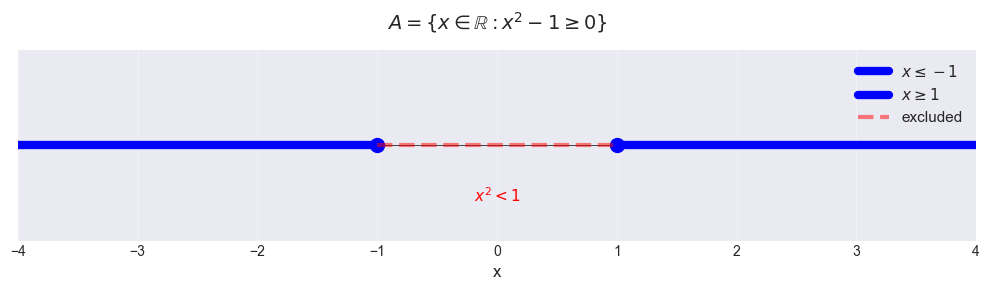

In [87]:
fig1, ax1 = plt.subplots(figsize=(10, 3))
ax1.set_title(r'$A = \{x \in \mathbb{R}: x^2 - 1 \geq 0\}$', fontsize=14, pad=15)
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlim(-4, 4)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.set_yticks([])
ax1.set_xlabel('x', fontsize=12)

# Plot the solution: x ≤ -1 or x ≥ 1
ax1.plot([-4, -1], [0, 0], 'b-', linewidth=6, label=r'$x \leq -1$')
ax1.plot([1, 4], [0, 0], 'b-', linewidth=6, label=r'$x \geq 1$')
ax1.plot([-1, 1], [0, 0], 'bo', markersize=10)
ax1.plot([-1, 1], [0, 0], 'r--', linewidth=3, alpha=0.5, label='excluded')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.text(0, -0.3, r'$x^2 < 1$', ha='center', fontsize=11, color='red')

plt.tight_layout()

- $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$

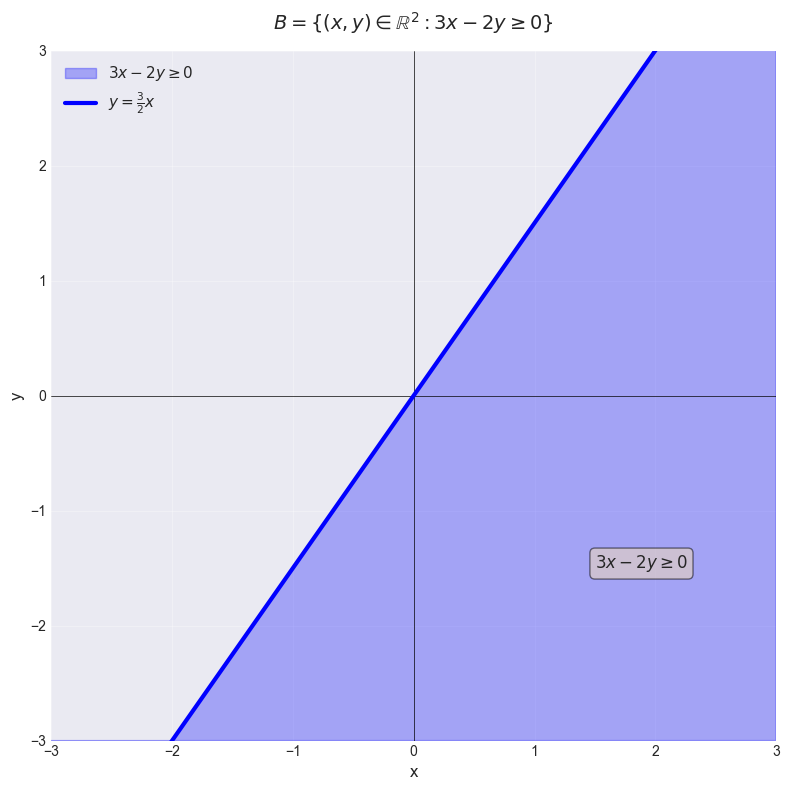

In [88]:
fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.set_title(r'$B = \{(x,y) \in \mathbb{R}^2: 3x - 2y \geq 0\}$', fontsize=14, pad=15)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)

# Boundary line: 3x - 2y = 0 => y = (3/2)x
x_line = np.array([-3, 3])
y_line = (3/2) * x_line

# Fill the region where 3x - 2y ≥ 0 (below the line)
ax2.fill_between(x_line, y_line, -3, alpha=0.3, color='blue', label=r'$3x - 2y \geq 0$')
ax2.plot(x_line, y_line, 'b-', linewidth=3, label=r'$y = \frac{3}{2}x$')
ax2.legend(fontsize=11)
ax2.text(1.5, -1.5, r'$3x - 2y \geq 0$', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

- $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$

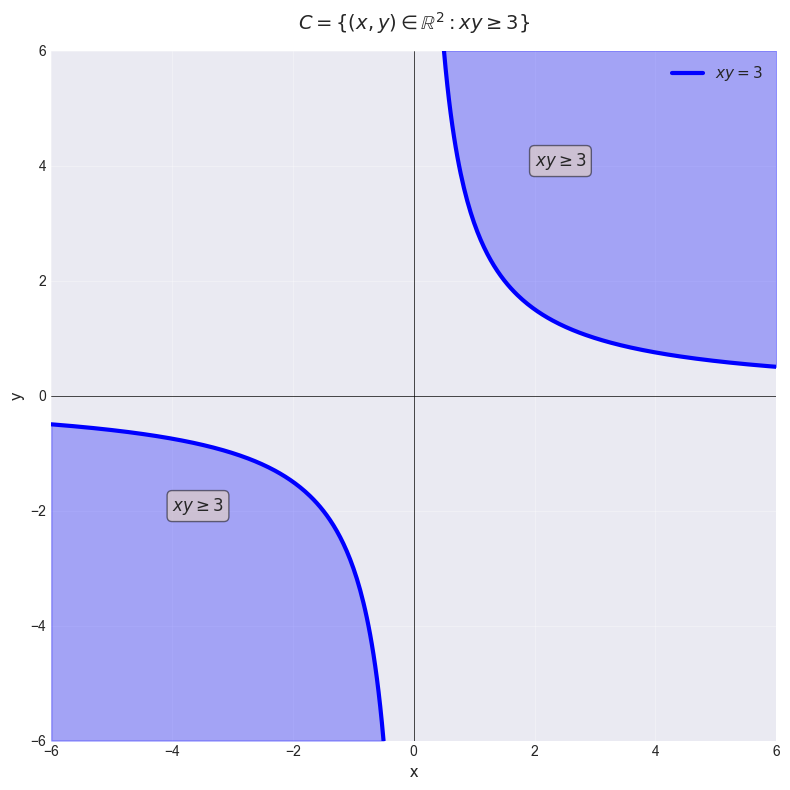

In [89]:
fig3, ax3 = plt.subplots(figsize=(8, 8))
ax3.set_title(r'$C = \{(x,y) \in \mathbb{R}^2: xy \geq 3\}$', fontsize=14, pad=15)
ax3.set_xlim(-6, 6)
ax3.set_ylim(-6, 6)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('y', fontsize=12)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.grid(True, alpha=0.3)

# Hyperbola: xy = 3
x_pos = np.linspace(0.5, 6, 200)
y_pos = 3 / x_pos

# Third quadrant: y = 3/x for x < 0
x_neg = np.linspace(-6, -0.5, 200)
y_neg = 3 / x_neg

ax3.plot(x_pos, y_pos, 'b-', linewidth=3, label=r'$xy = 3$')
ax3.plot(x_neg, y_neg, 'b-', linewidth=3)

ax3.fill_between(x_pos, y_pos, 6, alpha=0.3, color='blue')
ax3.fill_between(x_neg, y_neg, -6, alpha=0.3, color='blue')

ax3.legend(fontsize=11)
ax3.text(2, 4, r'$xy \geq 3$', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax3.text(-4, -2, r'$xy \geq 3$', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()

- $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$

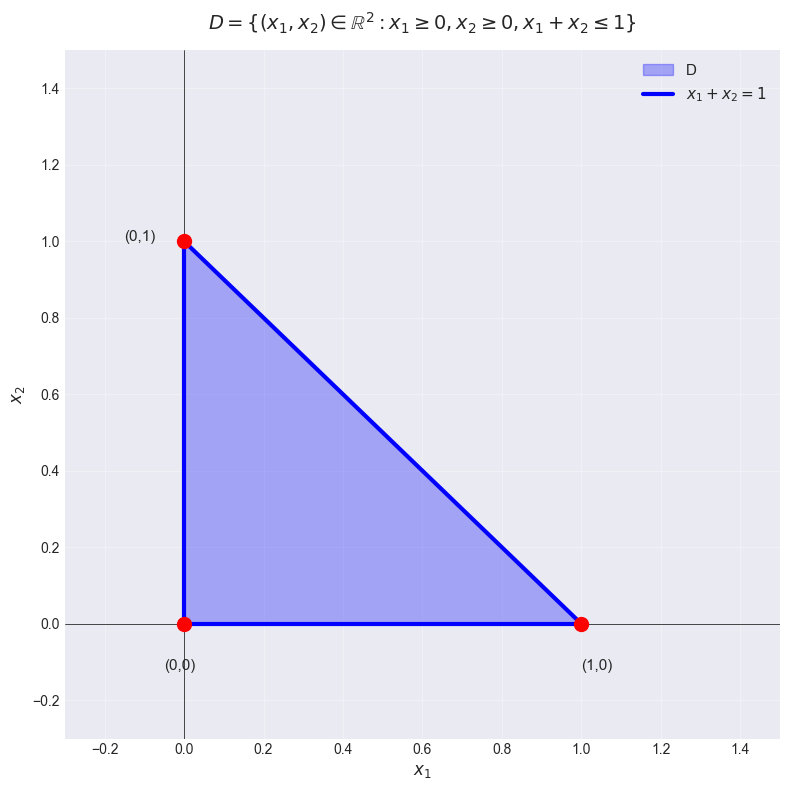

In [92]:
fig4, ax4 = plt.subplots(figsize=(8, 8))
ax4.set_title(r'$D = \{(x_1,x_2) \in \mathbb{R}^2: x_1 \geq 0, x_2 \geq 0, x_1 + x_2 \leq 1\}$', fontsize=14, pad=15)
ax4.set_xlim(-0.3, 1.5)
ax4.set_ylim(-0.3, 1.5)
ax4.set_xlabel(r'$x_1$', fontsize=12)
ax4.set_ylabel(r'$x_2$', fontsize=12)
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.axvline(x=0, color='k', linewidth=0.5)
ax4.grid(True, alpha=0.3)

triangle = Polygon([(0, 0), (1, 0), (0, 1)], alpha=0.3, color='blue', label='D')
ax4.add_patch(triangle)

ax4.plot([0, 1], [0, 0], 'b-', linewidth=3)  # x₂ = 0
ax4.plot([0, 0], [0, 1], 'b-', linewidth=3)  # x₁ = 0
ax4.plot([0, 1], [1, 0], 'b-', linewidth=3, label=r'$x_1 + x_2 = 1$')  # x₁ + x₂ = 1

ax4.plot([0, 1, 0], [0, 0, 1], 'ro', markersize=10)
ax4.text(-0.05, -0.12, '(0,0)', fontsize=11)
ax4.text(1, -0.12, '(1,0)', fontsize=11)
ax4.text(-0.15, 1, '(0,1)', fontsize=11)

ax4.legend(fontsize=11)

plt.tight_layout()

### e.
The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

The power set $\mathcal{P}({1,2,3})$ contains all possible subsets organized by size:
- $\emptyset$
- {1},{2},{3}
- {1,2},{1,3},{2,3}
- {1,2,3}

So, $\mathcal{P}({1,2,3}) = \{\emptyset,\{1\},\{2\},\{3\},\{1,2\},\{1,3\},\{2,3\},\{1,2,3\}\}$

## 2. Probability space basics:

### a. 

**What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?**


**Outcomes:** $\Omega = {1,2,3}$

**Set of all events:** The power set of $\Omega$ contains $2^3 = 8$ events:
- $\emptyset$ 
- {1},{2},{3}
- {1,2},{1,3},{2,3}
- {1,2,3}

- **Probabilities**:
- P($\emptyset$) = 0 
- P({1}) = P({2}) = P({3}) = $\frac{1}{3}$
- P({1,2}) = P({1,3}) = P({2,3}) = $\frac{2}{3}$
- P({1,2,3}) = 1

### b.

**What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)**

**Outcomes:** $\Omega = \{HH, HT, TH, TT\}$

**Set of all events:** The power set contains $2^4 = 16$ events:
- $\emptyset$
- {HH}, {HT}, {TH}, {TT}
- {HH, HT}, {HH, TH}, {HH, TT}, {HT, TH}, {HT TT}, {TH, TT}
- {HH, HT, TH}, {HH, HT, TT}, {HH, TH, TT}, {HT, TH, TT}
- {HH, HT, TH, TT}

**Probabilities:** Each outcome has probability $\frac{1}{4}$

### c.
**What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.**

**Outcomes:** $\Omega$ - {2,3,4,5,6}

**Set of all events:** The power set contains $2^5 = 32$ events. This includes the empty set, all the individual sums all the possible combinations of 2, 3 or 4 sums, and the full sample space.

**Probabilities:** The outcomes are not equally likely. The sum of 4 is most liekly (it occurs 3 ways: 1+3, 2+2, 3+1, out of 9 total rolls), while sums of 2 and 6 are least probable (each occurs only 1 way)

**Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.**

## 5. **CDF and PDF Basics**

**Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.**



### 1. 
$F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$

$f(x) = \frac{dF}{dx} = \frac{d}{dx}\sqrt{x}$ = $\frac{1}{2\sqrt{x}}$ for 0 < x < 1, 0 elsewhere


In [48]:
def F1(x):
    return np.where(x <= 0, 0, np.where(x <= 1, np.sqrt(x), 1))

def f1(x):
    return np.where((x > 0) & (x < 1), 1/(2*np.sqrt(x)), 0)

In [56]:
def F1(x):
    x = np.asarray(x, dtype=float)
    y = np.empty_like(x)
    y[x <= 0] = 0.0
    m = (x > 0) & (x <= 1)
    y[m] = np.sqrt(x[m])          # only sqrt valid region
    y[x > 1] = 1.0
    return y

def f1(x):
    x = np.asarray(x, dtype=float)
    y = np.zeros_like(x)
    m = (x > 0) & (x < 1)
    y[m] = 1.0 / (2.0 * np.sqrt(x[m]))  # only sqrt valid region
    return y

**Verification:**

In [57]:
print(f"  F(-∞) = F(-1) = {F1(-1):.4f} (should be 0)")
print(f"  F(+∞) = F(2) = {F1(2):.4f} (should be 1)")
print(f"  F is non-decreasing: √x is increasing on [0,1]")

  F(-∞) = F(-1) = 0.0000 (should be 0)
  F(+∞) = F(2) = 1.0000 (should be 1)
  F is non-decreasing: √x is increasing on [0,1]


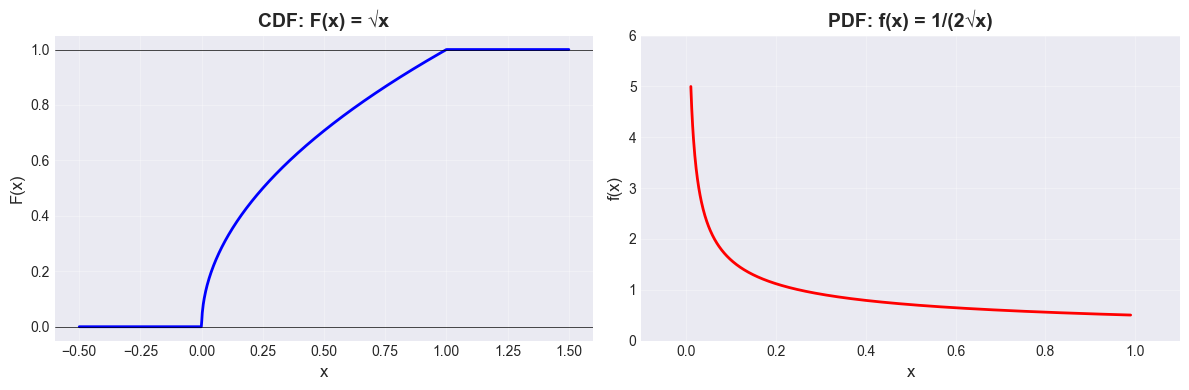

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Plot
x1 = np.linspace(-0.5, 1.5, 1000)
ax1.plot(x1, F1(x1), 'b-', linewidth=2)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('F(x)', fontsize=12)
ax1.set_title('CDF: F(x) = √x', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axhline(y=1, color='k', linewidth=0.5)

x1_pdf = np.linspace(0.01, 0.99, 1000)
ax2.plot(x1_pdf, f1(x1_pdf), 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('PDF: f(x) = 1/(2√x)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(0, 6)

plt.tight_layout()

### 2. 
$F(x) = \dfrac{1}{1+e^{-x}}$


$f(x) = \frac{dF}{dx} = \frac{d}{dx} [\frac{1}{1 + e^{-x}}] = \frac{e^{-x}}{(1+e^{-x})^2}$

In [59]:
def F2(x):
    return 1 / (1 + np.exp(-x))

def f2(x):
    exp_term = np.exp(-x)
    return exp_term / (1 + exp_term)**2

**Verification:**

In [98]:
print(f"  F(-∞) = lim F(x) as x→-∞ = 0")
print(f"  F(+∞) = lim F(x) as x→+∞ = 1")
print(f"  F(-10) = {F2(-10):.6f}, F(10) = {F2(10):.6f}")
print(f"  F is non-decreasing: f(x) = e^(-x)/(1+e^(-x))² > 0 for all x")

  F(-∞) = lim F(x) as x→-∞ = 0
  F(+∞) = lim F(x) as x→+∞ = 1
  F(-10) = 0.000045, F(10) = 0.999955
  F is non-decreasing: f(x) = e^(-x)/(1+e^(-x))² > 0 for all x


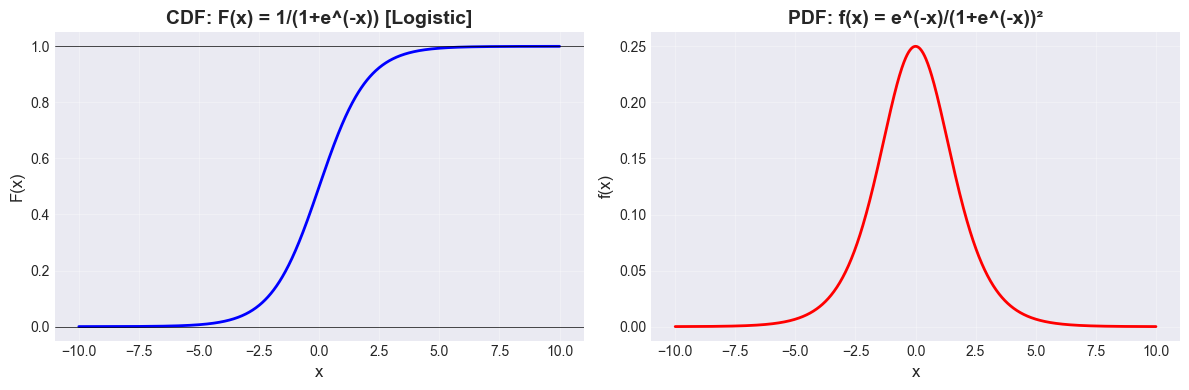

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x2 = np.linspace(-10, 10, 1000)
ax1.plot(x2, F2(x2), 'b-', linewidth=2)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('F(x)', fontsize=12)
ax1.set_title('CDF: F(x) = 1/(1+e^(-x)) [Logistic]', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axhline(y=1, color='k', linewidth=0.5)

ax2.plot(x2, f2(x2), 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('PDF: f(x) = e^(-x)/(1+e^(-x))²', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()

### 3. 
For $ a < b < c$,

$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$

In [ ]:
a, c, b = 0, 1, 3

def F3(x, a=a, c=c, b=b):
    result = np.zeros_like(x, dtype=float)
    mask1 = (x >= a) & (x <= c)
    mask2 = (x > c) & (x < b)
    mask3 = x >= b
    
    result[mask1] = (x[mask1] - a)**2 / ((b - a) * (c - a))
    result[mask2] = 1 - (b - x[mask2])**2 / ((b - a) * (b - c))
    result[mask3] = 1
    
    return result

def f3(x, a=a, c=c, b=b):
    # f(x) = dF/dx
    result = np.zeros_like(x, dtype=float)
    mask1 = (x > a) & (x < c)
    mask2 = (x > c) & (x < b)
    
    result[mask1] = 2 * (x[mask1] - a) / ((b - a) * (c - a))
    result[mask2] = 2 * (b - x[mask2]) / ((b - a) * (b - c))
    
    return result

**Verification:**

In [95]:
print(f"Using parameters: a={a}, c={c}, b={b}")
print(f"  F(a) = F({a}) = {F3(np.array([a]))[0]:.4f} (should be 0)")
print(f"  F(b) = F({b}) = {F3(np.array([b]))[0]:.4f} (should be 1)")
print(f"  F(c) = F({c}) = {F3(np.array([c]))[0]:.4f}")

Using parameters: a=0, c=1, b=3
  F(a) = F(0) = 0.0000 (should be 0)
  F(b) = F(3) = 1.0000 (should be 1)
  F(c) = F(1) = 0.3333


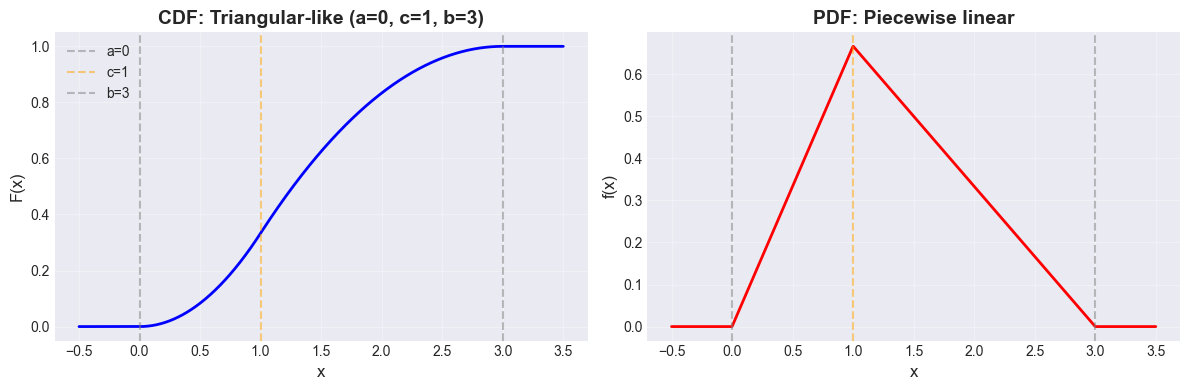

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x3 = np.linspace(-0.5, 3.5, 1000)
ax1.plot(x3, F3(x3), 'b-', linewidth=2)
ax1.axvline(x=a, color='gray', linestyle='--', alpha=0.5, label=f'a={a}')
ax1.axvline(x=c, color='orange', linestyle='--', alpha=0.5, label=f'c={c}')
ax1.axvline(x=b, color='gray', linestyle='--', alpha=0.5, label=f'b={b}')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('F(x)', fontsize=12)
ax1.set_title(f'CDF: Triangular-like (a={a}, c={c}, b={b})', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(x3, f3(x3), 'r-', linewidth=2)
ax2.axvline(x=a, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=c, color='orange', linestyle='--', alpha=0.5)
ax2.axvline(x=b, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('PDF: Piecewise linear', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()


### 4. 

$ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$ 


**Derivative:**
$f(x) = e^{-x}$ for x > 0, 0 for x < 0

In [ ]:
def F4(x):
    return np.where(x < 0, 0, 1 - np.exp(-x))

def f4(x):
    return np.where(x >= 0, np.exp(-x), 0)

**Verification:**

In [96]:
print(f"  F(-∞) = F(-1) = {F4(-1):.4f} (should be 0)")
print(f"  F(+∞) = lim (1-e^(-x)) = 1")
print(f"  F(10) = {F4(10):.6f}")
print(f"  F is non-decreasing: f(x) = e^(-x) > 0 for x > 0")

  F(-∞) = F(-1) = 0.0000 (should be 0)
  F(+∞) = lim (1-e^(-x)) = 1
  F(10) = 0.999955
  F is non-decreasing: f(x) = e^(-x) > 0 for x > 0


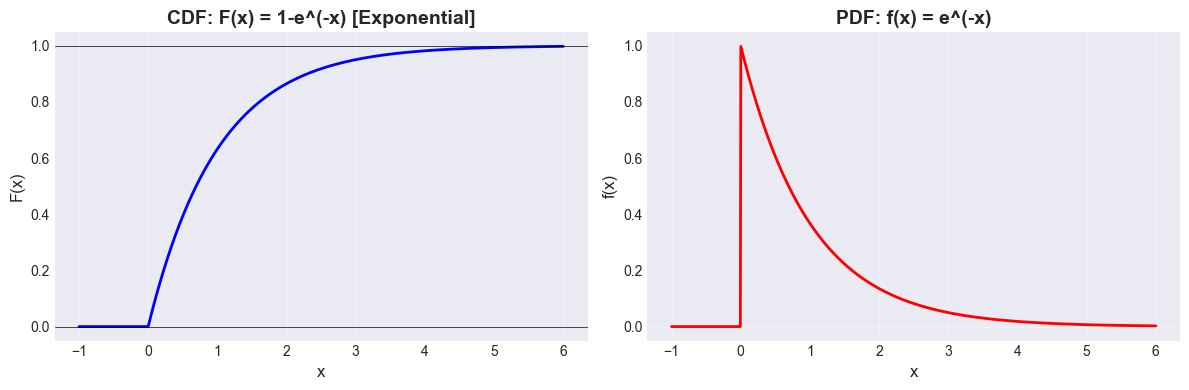

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x4 = np.linspace(-1, 6, 1000)
ax1.plot(x4, F4(x4), 'b-', linewidth=2)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('F(x)', fontsize=12)
ax1.set_title('CDF: F(x) = 1-e^(-x) [Exponential]', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axhline(y=1, color='k', linewidth=0.5)

ax2.plot(x4, f4(x4), 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('PDF: f(x) = e^(-x)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()


### 5. 
$ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

**Derivative:**
$f(x) = 1 for 0 < x < 1, 0 elsewhere$

In [ ]:
def F5(x):
    return np.where(x <= 0, 0, np.where(x < 1, x, 1))

def f5(x):
    return np.where((x > 0) & (x < 1), 1, 0)

**Verification:**

In [97]:
print(f"  F(-∞) = F(-1) = {F5(-1):.4f} (should be 0)")
print(f"  F(+∞) = F(2) = {F5(2):.4f} (should be 1)")
print(f"  F is non-decreasing: F(x) = x is increasing on [0,1]")

  F(-∞) = F(-1) = 0.0000 (should be 0)
  F(+∞) = F(2) = 1.0000 (should be 1)
  F is non-decreasing: F(x) = x is increasing on [0,1]


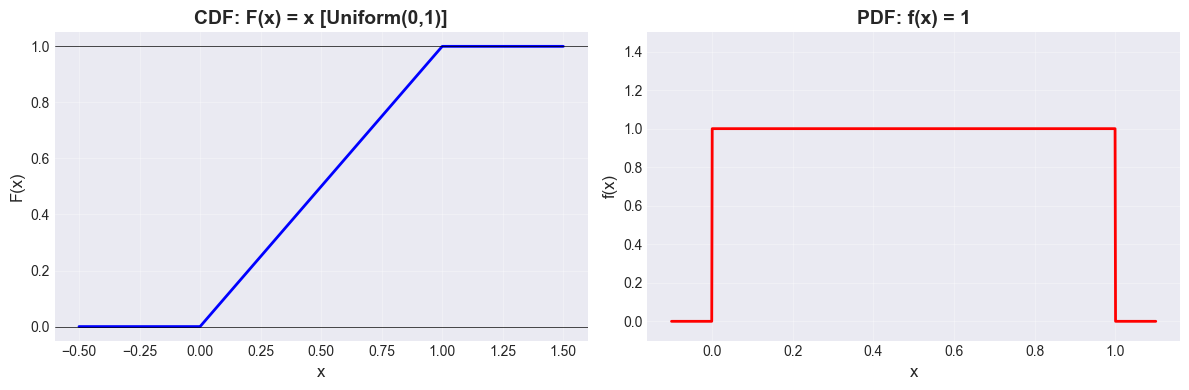

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

x5 = np.linspace(-0.5, 1.5, 1000)
ax1.plot(x5, F5(x5), 'b-', linewidth=2)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('F(x)', fontsize=12)
ax1.set_title('CDF: F(x) = x [Uniform(0,1)]', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axhline(y=1, color='k', linewidth=0.5)

x5_pdf = np.linspace(-0.1, 1.1, 1000)
ax2.plot(x5_pdf, f5(x5_pdf), 'r-', linewidth=2)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title('PDF: f(x) = 1', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.5)

plt.tight_layout()

## 6. Some Common Distributions

**For the following distributions:**
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

**You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.**

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
cancer = pd.read_csv('metabric.csv')

In [5]:
cancer.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


### 1. **Logistic distribution (similar to normal):**
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
**with** $$\sigma >0$$


- **Support:** x ∈ (--∞, ∞)



- **Density Derivative:**

$$
f(x; \sigma) = \frac{dF}{dx} = \frac{d}{dx}[\frac{1}{(1 + e^{-x/\sigma})}]
$$

$$
= -(1 + e^{-x/\sigma})^{-2} \cdot \frac{d}{dx}[e^{-x/\sigma}]
$$

$$
= -(1 + e^{-x/\sigma})^{-2} \cdot e^{-x/\sigma} \cdot (-1/\sigma)
$$


$$
=  \frac{e^{-x/\sigma}}{\sigma(1 + e^{-x/\sigma})^{2}}
$$

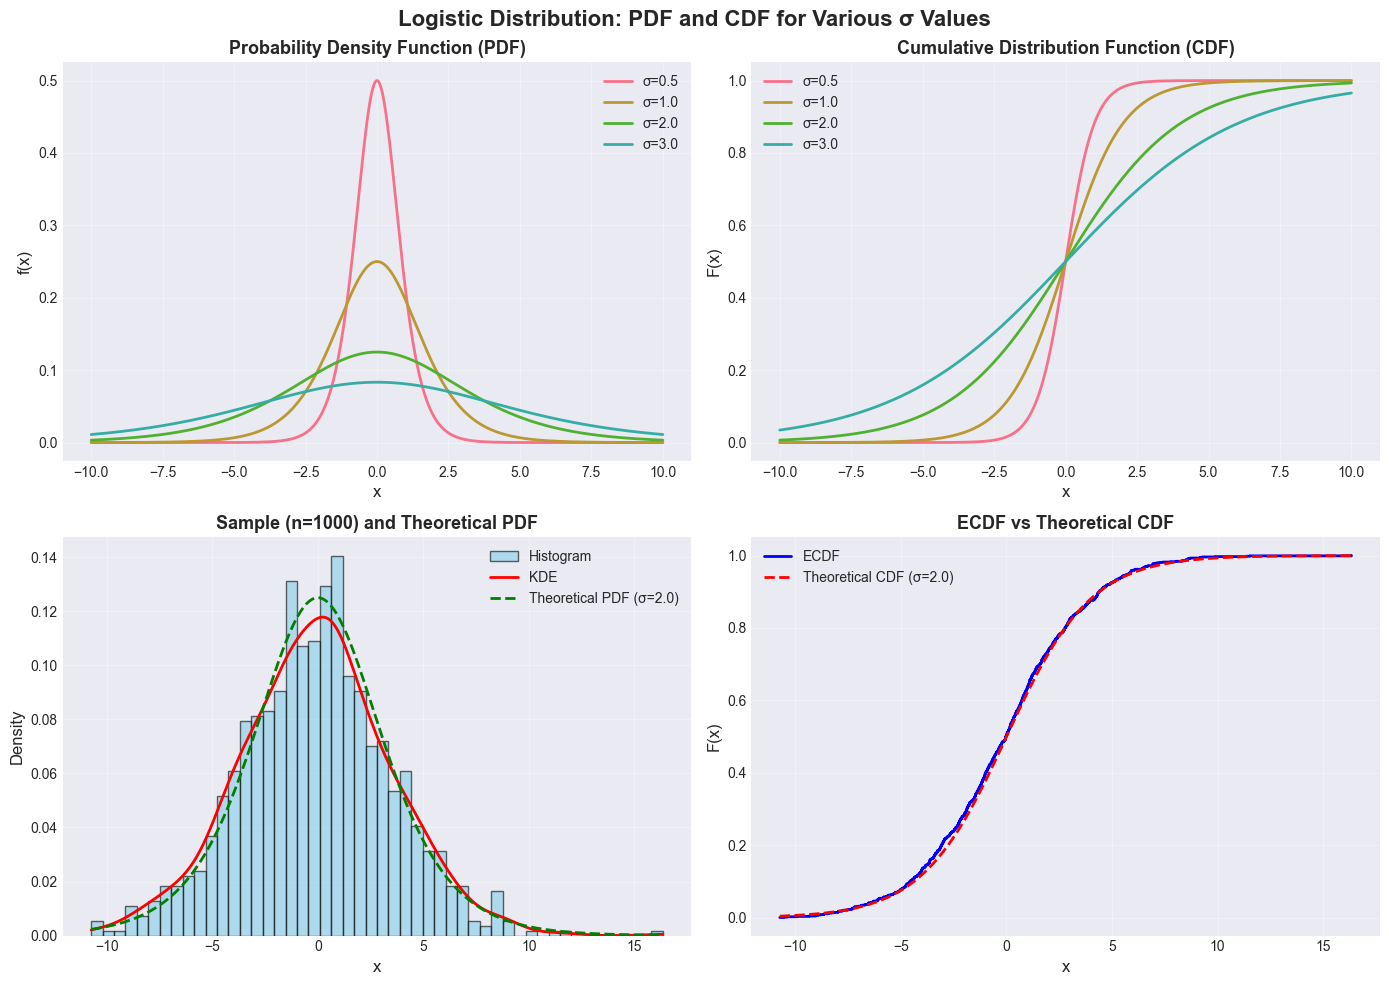

In [ ]:
# Define logistic CDF and PDF
def logistic_cdf(x, sigma):
    return 1 / (1 + np.exp(-x/sigma))

def logistic_pdf(x, sigma):
    exp_term = np.exp(-x/sigma)
    return exp_term / (sigma * (1 + exp_term)**2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Logistic Distribution: PDF and CDF for Various σ Values', fontsize=16, fontweight='bold')

x = np.linspace(-10, 10, 1000)
sigmas = [0.5, 1.0, 2.0, 3.0]

# PDF
for sigma in sigmas:
    axes[0, 0].plot(x, logistic_pdf(x, sigma), label=f'σ={sigma}', linewidth=2)
axes[0, 0].set_xlabel('x', fontsize=12)
axes[0, 0].set_ylabel('f(x)', fontsize=12)
axes[0, 0].set_title('Probability Density Function (PDF)', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# CDF
for sigma in sigmas:
    axes[0, 1].plot(x, logistic_cdf(x, sigma), label=f'σ={sigma}', linewidth=2)
axes[0, 1].set_xlabel('x', fontsize=12)
axes[0, 1].set_ylabel('F(x)', fontsize=12)
axes[0, 1].set_title('Cumulative Distribution Function (CDF)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

np.random.seed(42)
sigma_sample = 2.0
sample = stats.logistic.rvs(loc=0, scale=sigma_sample, size=1000)

# KDE
kde = gaussian_kde(sample)
x_kde = np.linspace(sample.min(), sample.max(), 500)
axes[1, 0].hist(sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
axes[1, 0].plot(x_kde, kde(x_kde), 'r-', linewidth=2, label='KDE')
axes[1, 0].plot(x_kde, logistic_pdf(x_kde, sigma_sample), "g--", linewidth=2, label=f'Theoretical PDF (σ={sigma_sample})')
axes[1, 0].set_xlabel('x', fontsize=12)
axes[1, 0].set_ylabel('Density', fontsize=12)
axes[1, 0].set_title(f'Sample (n=1000) and Theoretical PDF', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# ECDF
sample_sorted = np.sort(sample)
ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
axes[1, 1].step(sample_sorted, ecdf, 'b-', linewidth=2, label='ECDF', where='post')
axes[1, 1].plot(x_kde, logistic_cdf(x_kde, sigma_sample), 'r--', linewidth=2, label=f'Theoretical CDF (σ={sigma_sample})')
axes[1, 1].set_xlabel('x', fontsize=12)
axes[1, 1].set_ylabel('F(x)', fontsize=12)
axes[1, 1].set_title(f'ECDF vs Theoretical CDF', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

We'll use "Age at Diagnosis" from the metabric cancer data

In [7]:
age_data = cancer['Age at Diagnosis'].dropna()
age_standardized = (age_data - age_data.mean()) / age_data.std()

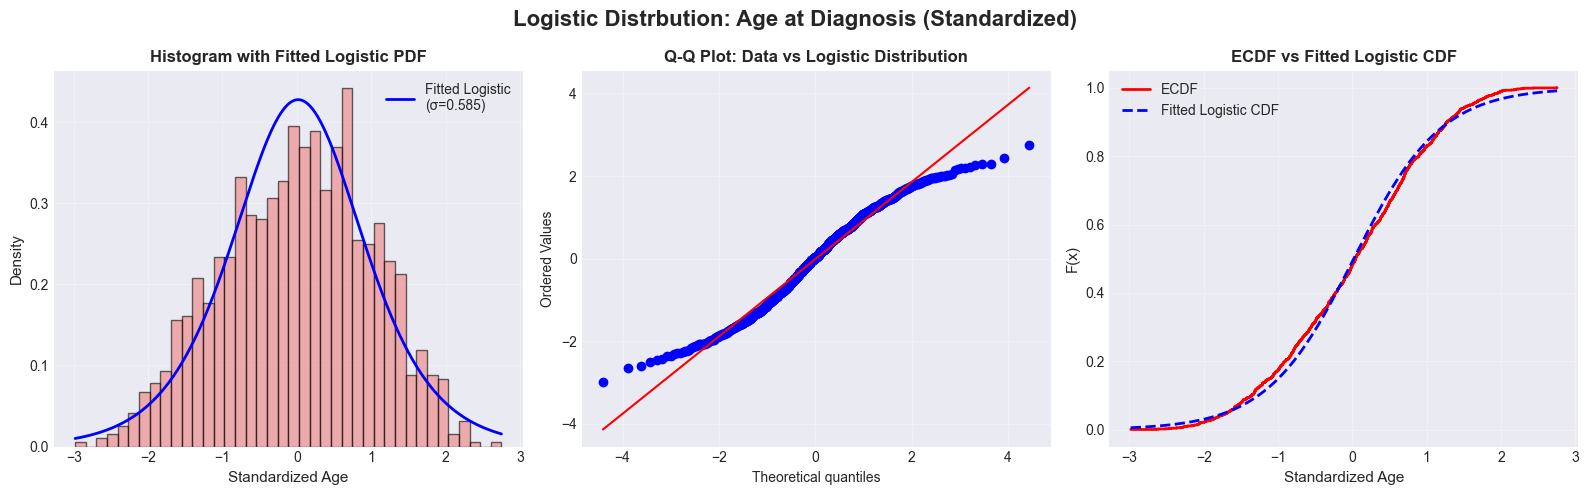

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Logistic Distrbution: Age at Diagnosis (Standardized)', fontsize=16, fontweight='bold')

# Histogram with fitted logistic
axes[0].hist(age_standardized, bins=40, density=True, alpha=0.6, color='lightcoral', edgecolor='black')
x_fit = np.linspace(age_standardized.min(), age_standardized.max(), 500)

loc_fit, scale_fit = stats.logistic.fit(age_standardized)
axes[0].plot(x_fit, stats.logistic.pdf(x_fit, loc=loc_fit, scale=scale_fit), 'b-', 
linewidth=2, label=f'Fitted Logistic\n(σ={scale_fit:.3f})')
axes[0].set_xlabel('Standardized Age', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Histogram with Fitted Logistic PDF', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

## QQ plot
stats.probplot(age_standardized, dist=stats.logistic, sparams=(loc_fit, scale_fit), plot=axes[1])
axes[1].set_title('Q-Q Plot: Data vs Logistic Distribution', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# ECDF Comparison
age_sorted = np.sort(age_standardized)
ecdf_age = np.arange(1, len(age_sorted)+1) / len(age_sorted)
axes[2].step(age_sorted, ecdf_age, 'r-', linewidth=2, label='ECDF', where='post')
axes[2].plot(x_fit, stats.logistic.cdf(x_fit, loc=loc_fit, scale=scale_fit), 'b--', 
linewidth=2, label='Fitted Logistic CDF')
axes[2].set_xlabel('Standardized Age', fontsize=11)
axes[2].set_ylabel('F(x)', fontsize=11)
axes[2].set_title('ECDF vs Fitted Logistic CDF', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()

In [40]:
print(f"Age at Diagnosis (standardized): mean={loc_fit:.3f}, scale σ={scale_fit:.3f}")

Age at Diagnosis (standardized): mean=0.000, scale σ=25.787


### 2. **Exponential distribution (similar to log-normal):**
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
**with** $$\lambda > 0$$


- **Support:** x ∈ [0, ∞)

- **Density Derivation:**

$$
f(x; \lambda) = \frac{dF}{dx} = \frac{d}{dx}[1 - e^{-\lambda x}]
$$

$$
= -e^{-\lambda x} \cdot (-\lambda)
$$

$$
= \lambda e^{-\lambda x}
$$

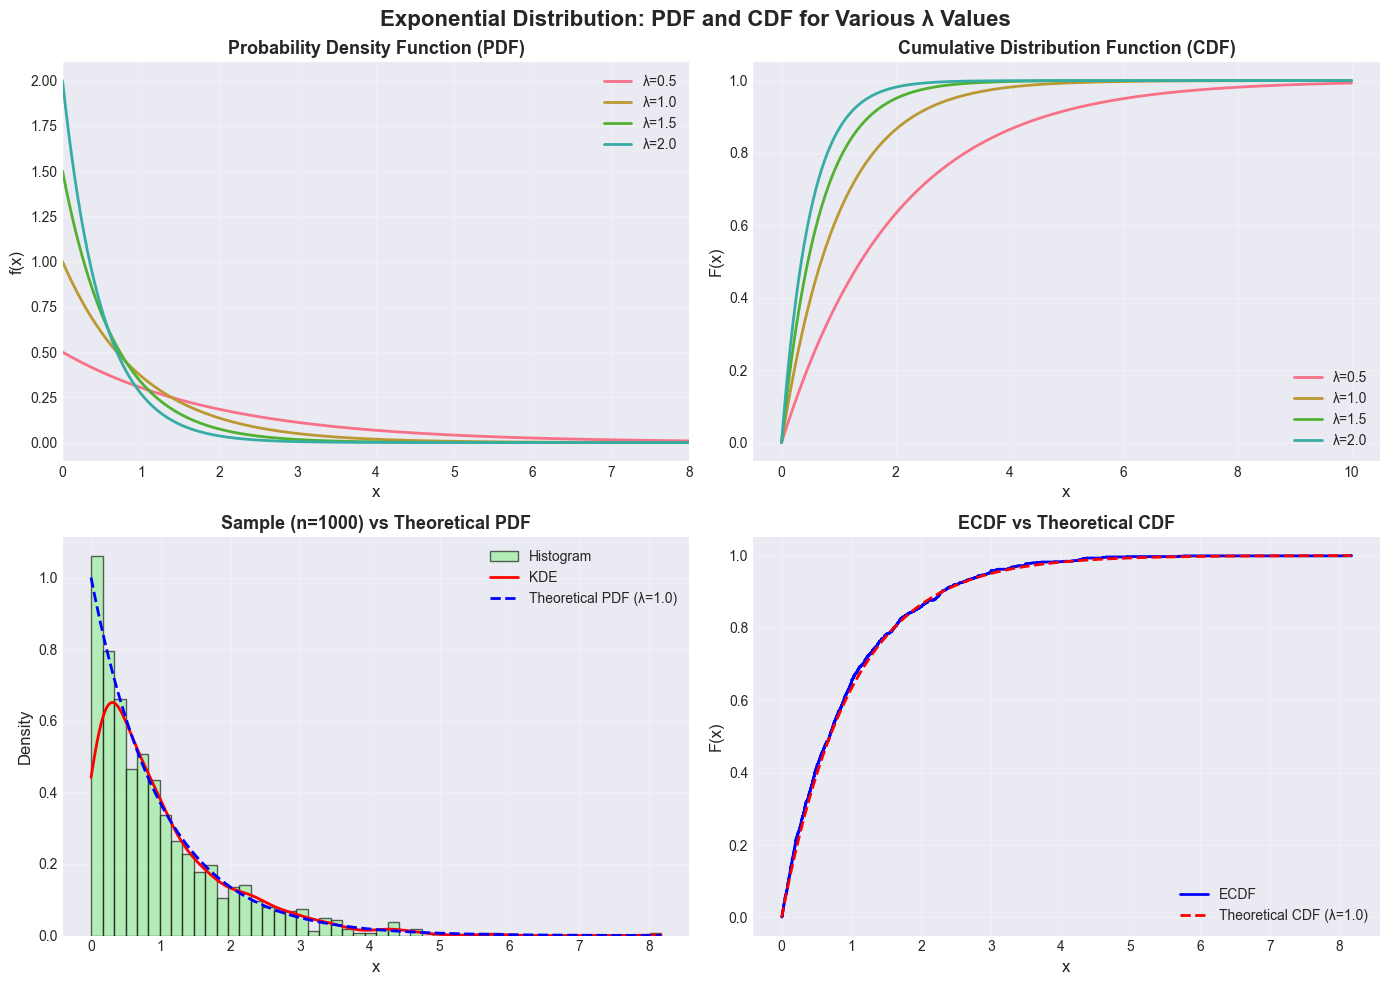

In [15]:
def expoential_cdf(x, lam):
    return np.where(x >= 0, 1 - np.exp(-lam * x), 0)

def exponential_pdf(x, lam):
    return np.where(x >= 0, lam * np.exp(-lam * x), 0)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Exponential Distribution: PDF and CDF for Various λ Values", fontsize=16, fontweight='bold')

x = np.linspace(0, 10, 1000)
lambdas = [0.5, 1.0, 1.5, 2.0]

# PDF
for lam in lambdas:
    axes[0, 0].plot(x, exponential_pdf(x, lam), label=f'λ={lam}', linewidth=2)
axes[0, 0].set_xlabel('x', fontsize = 12)
axes[0, 0].set_ylabel('f(x)', fontsize = 12)
axes[0, 0].set_title("Probability Density Function (PDF)", fontsize = 13, fontweight = "bold")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha = 0.3)
axes[0, 0].set_xlim(0, 8)

# CDF
for lam in lambdas:
    axes[0, 1].plot(x, expoential_cdf(x, lam), label=f'λ={lam}', linewidth=2)
axes[0, 1].set_xlabel('x', fontsize = 12)
axes[0, 1].set_ylabel('F(x)', fontsize = 12)
axes[0, 1].set_title("Cumulative Distribution Function (CDF)", fontsize = 13, fontweight = "bold")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha = 0.3)

np.random.seed(42)
lam_sample = 1.0
sample = np.random.exponential(scale=1/lam_sample, size = 1000)

# KDE
kde = gaussian_kde(sample)
x_kde = np.linspace(0, sample.max(), 500)
axes[1, 0].hist(sample, bins=50, density=True, alpha=0.6, color = "lightgreen", edgecolor = "black", label = "Histogram")
axes[1, 0].plot(x_kde, kde(x_kde), "r-", linewidth = 2, label = "KDE")
axes[1, 0].plot(x_kde, exponential_pdf(x_kde, lam_sample), "b--", linewidth = 2, label = f"Theoretical PDF (λ={lam_sample})")
axes[1, 0].set_xlabel('x', fontsize = 12)
axes[1, 0].set_ylabel('Density', fontsize = 12)
axes[1, 0].set_title(f'Sample (n=1000) vs Theoretical PDF', fontsize = 13, fontweight = "bold")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha = 0.3)

# ECDF
sample_sorted = np.sort(sample)
ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
axes[1, 1].step(sample_sorted, ecdf, 'b-', linewidth = 2, label = "ECDF", where = 'post')
axes[1, 1].plot(x_kde, expoential_cdf(x_kde, lam_sample), "r--", linewidth = 2, label = f"Theoretical CDF (λ={lam_sample})")
axes[1, 1].set_xlabel('x', fontsize = 12)
axes[1, 1].set_ylabel("F(x)", fontsize = 12)
axes[1, 1].set_title(f'ECDF vs Theoretical CDF', fontsize = 13, fontweight = 'bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha = 0.3)

plt.tight_layout()

I am using the `Tumer Size` variable from the Metabric cancer data for this

In [17]:
# Tumor Size (positive continuous)
tumor_size_data = cancer['Tumor Size'].dropna()
tumor_size_data = tumor_size_data[tumor_size_data > 0]

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

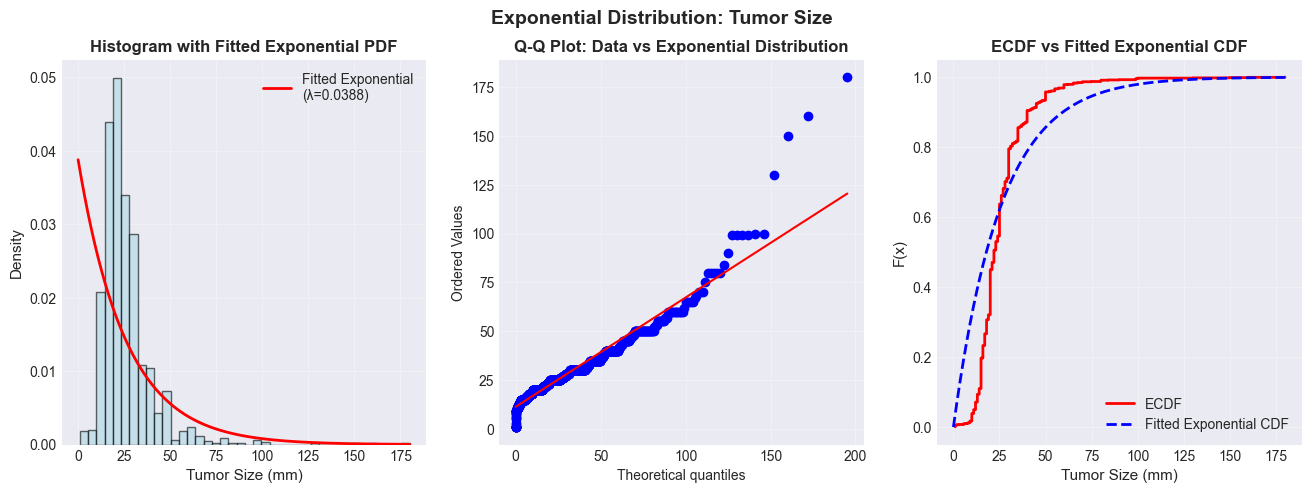

In [100]:
fig, axes = plt.subplots(1, 3, figsize= (16, 5))
fig.suptitle('Exponential Distribution: Tumor Size', fontsize = 14, fontweight = 'bold')

# Histogram with fitted exponential
axes[0].hist(tumor_size_data, bins=40, density=True, alpha=0.6, color='lightblue', edgecolor='black')
x_fit = np.linspace(0, tumor_size_data.max(), 500)
loc_fit, scale_fit = stats.expon.fit(tumor_size_data, floc=0)
lam_fit = 1/scale_fit
axes[0].plot(x_fit, stats.expon.pdf(x_fit, loc=loc_fit, scale=scale_fit), 'r-', 
             linewidth=2, label=f'Fitted Exponential\n(λ={lam_fit:.4f})')
axes[0].set_xlabel('Tumor Size (mm)', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Histogram with Fitted Exponential PDF', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# QQ plot
stats.probplot(tumor_size_data, dist = stats.expon, sparams=(loc_fit, scale_fit), plot=axes[1])
axes[1].set_title('Q-Q Plot: Data vs Exponential Distribution', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# EDCF Comparison
tumor_sorted = np.sort(tumor_size_data)
ecdf_tumor = np.arange(1, len(tumor_sorted)+1) / len(tumor_sorted)
axes[2].step(tumor_sorted, ecdf_tumor, 'r-', linewidth=2, label='ECDF', where='post')
axes[2].plot(x_fit, stats.expon.cdf(x_fit, loc=loc_fit, scale=scale_fit), 'b--', linewidth=2, label='Fitted Exponential CDF')
axes[2].set_xlabel('Tumor Size (mm)', fontsize=11)
axes[2].set_ylabel('F(x)', fontsize=11)
axes[2].set_title('ECDF vs Fitted Exponential CDF', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout

In [39]:
print(f"Tumor Size: λ={lam_fit:.4f}, mean={1/lam_fit:.2f}mm")

Tumor Size: λ=0.0388, mean=25.79mm


### 3. **Negative Binomial (similar to Poisson):** 
**The probability mass function for positive integers is:**
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
**You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?**


- **Suport:** k ∈ {0, 1, 2, 3, ...} (non-negative integers)

- **Probability Mass Function:**

$$
f(k; r, p) = \binom{k+r-1}{k} \cdot (1-p)^k \cdot p^r
$$

where 

$$
\binom{k+r-1}{k} = \frac{(k+r-1)!}{k!(r-1)!}
$$

- **Interpretation:** Number of failures before r-th success in Bernoulli trials

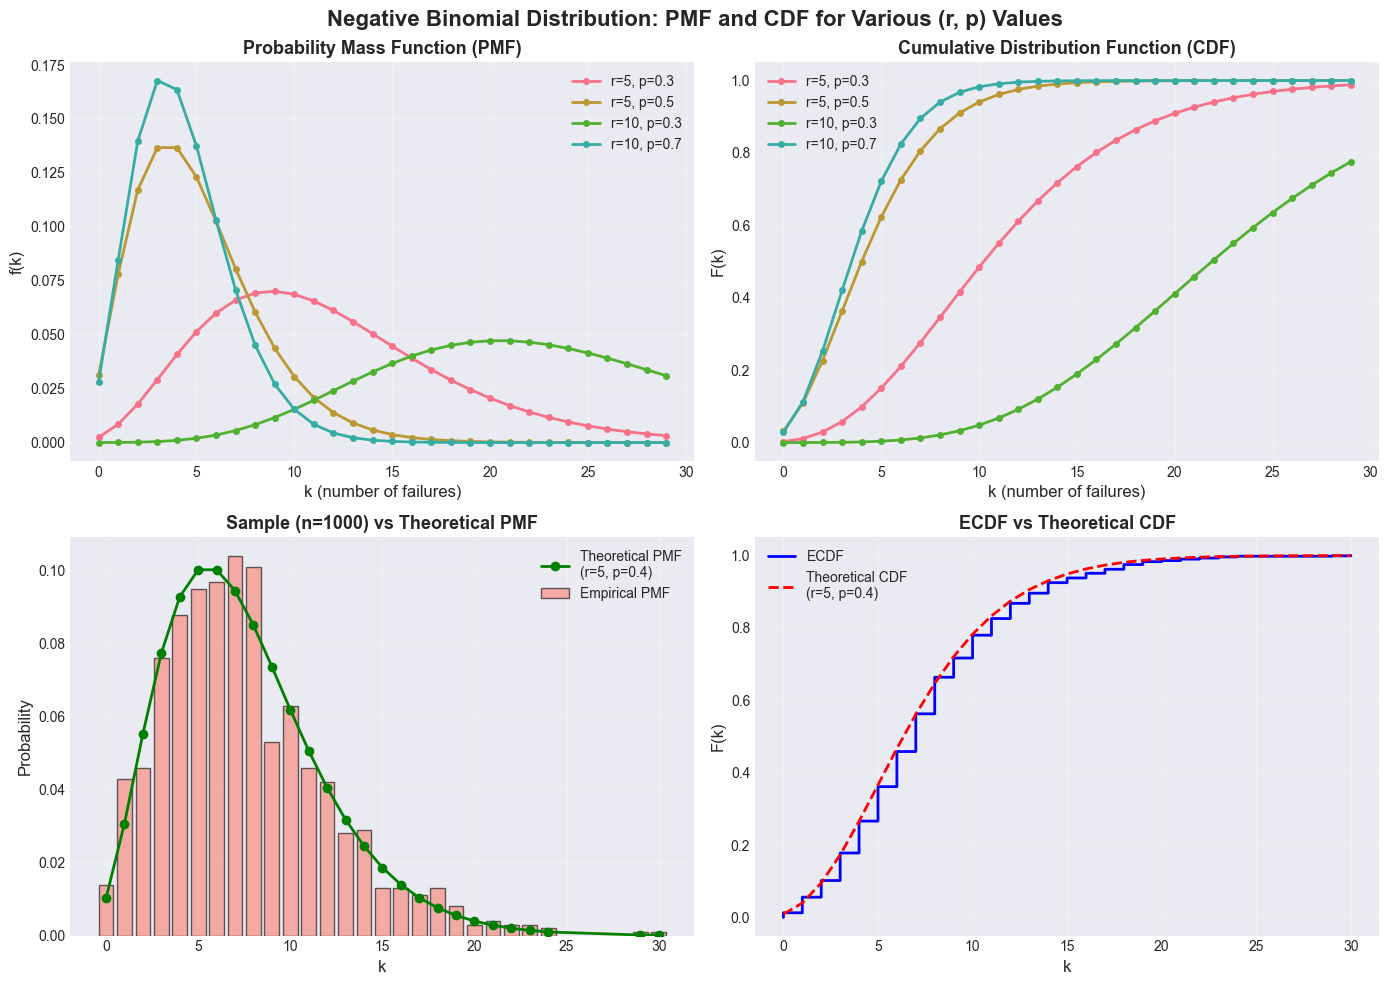

In [26]:
def negbinom_pmf(k, r, p):
    from scipy.special import comb
    return comb(k + r - 1, k) * ((1-p)**k) * (p**r)

fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle("Negative Binomial Distribution: PMF and CDF for Various (r, p) Values", fontsize = 16, fontweight = 'bold')

k = np.arange(0, 30)
params = [(5, 0.3), (5, 0.5), (10, 0.3), (10, 0.7)]

# PMF
for (r, p) in params:
    pmf = [negbinom_pmf(ki, r, p) for ki in k]
    axes[0, 0].plot(k, pmf, 'o-', label = f"r={r}, p={p}", linewidth = 2, markersize = 4)
axes[0, 0].set_xlabel('k (number of failures)', fontsize = 12)
axes[0, 0].set_ylabel('f(k)', fontsize = 12)
axes[0, 0].set_title('Probability Mass Function (PMF)', fontsize = 13, fontweight = 'bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha = 0.3)

# CDF
for (r, p) in params:
    cdf = [sum(negbinom_pmf(j, r, p) for j in range(ki+1)) for ki in k]
    axes[0, 1].plot(k, cdf, 'o-', label = f"r={r}, p={p}", linewidth = 2, markersize = 4)
axes[0, 1].set_xlabel('k (number of failures)', fontsize = 12)
axes[0, 1].set_ylabel('F(k)', fontsize = 12)
axes[0, 1].set_title('Cumulative Distribution Function (CDF)', fontsize = 13, fontweight = 'bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha = 0.3)

np.random.seed(42)
r_sample, p_sample = 5, 0.4
sample = stats.nbinom.rvs(n = r_sample, p = p_sample, size = 1000)

# Empirical PMF
unique, counts = np.unique(sample, return_counts=True)
empirical_pmf = counts / len(sample)
theoretical_pmf = [negbinom_pmf(ki, r_sample, p_sample) for ki in unique]

axes[1, 0].bar(unique, empirical_pmf, alpha=0.6, color='salmon', edgecolor='black', label='Empirical PMF')
axes[1, 0].plot(unique, theoretical_pmf, 'go-', linewidth=2, markersize=6, label=f'Theoretical PMF\n(r={r_sample}, p={p_sample})')
axes[1, 0].set_xlabel('k', fontsize=12)
axes[1, 0].set_ylabel('Probability', fontsize=12)
axes[1, 0].set_title(f'Sample (n=1000) vs Theoretical PMF', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# ECDF
sample_sorted = np.sort(sample)
ecdf = np.arange(1, len(sample_sorted)+1) / len(sample_sorted)
k_range = np.arange(0, sample.max()+1)
theoretical_cdf = [sum(negbinom_pmf(j, r_sample, p_sample) for j in range(ki+1)) for ki in k_range]
axes[1, 1].step(sample_sorted, ecdf, 'b-', linewidth=2, label='ECDF', where='post')
axes[1, 1].plot(k_range, theoretical_cdf, 'r--', linewidth=2, label=f'Theoretical CDF\n(r={r_sample}, p={p_sample})')
axes[1, 1].set_xlabel('k', fontsize=12)
axes[1, 1].set_ylabel('F(k)', fontsize=12)
axes[1, 1].set_title(f'ECDF vs Theoretical CDF', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

For this distribution I am using the `Mutation Count` variable from the cancer data

In [27]:
mutation_data = cancer['Mutation Count'].dropna().astype(int)
mutation_data = mutation_data[mutation_data >= 0]

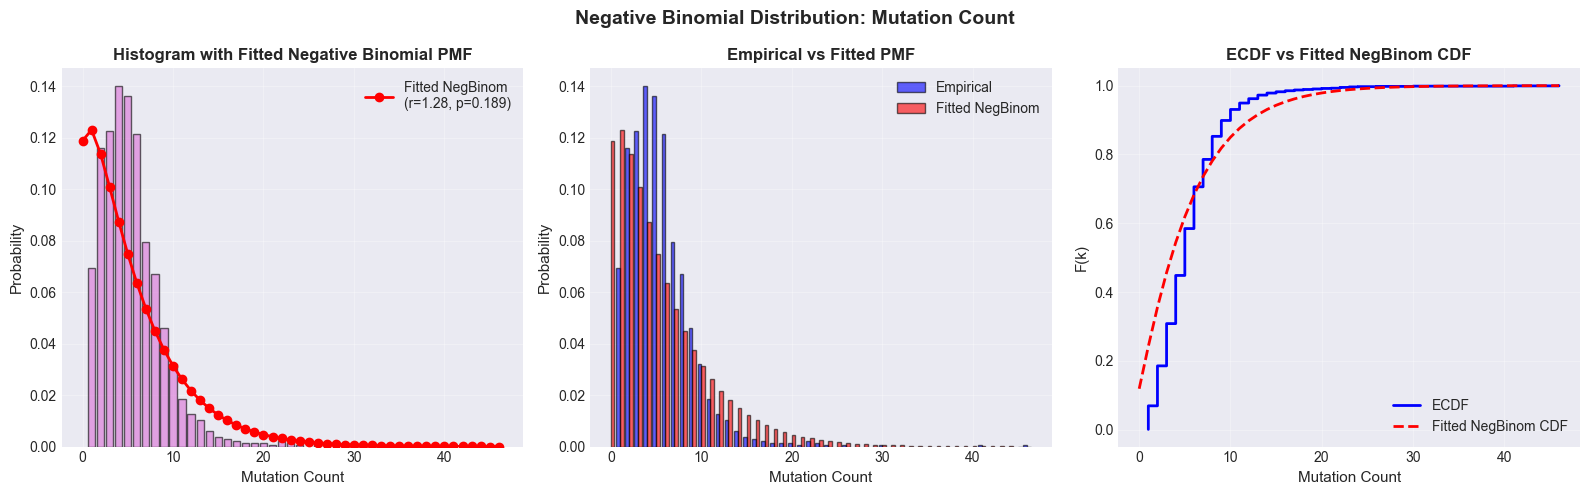

In [103]:
fig, axes = plt.subplots(1, 3, figsize= (16, 5))
fig.suptitle('Negative Binomial Distribution: Mutation Count', fontsize = 14, fontweight = 'bold')

# Histogram with fitted negative binomial
unique_vals, counts = np.unique(mutation_data, return_counts=True)
axes[0].bar(unique_vals, counts/len(mutation_data), alpha=0.6, color='orchid', edgecolor='black', width=0.8)

# Fit negative binomial
mean_data = mutation_data.mean()
var_data = mutation_data.var()

# Method of moments: var = mean + mean²/r, so r = mean²/(var-mean)
if var_data > mean_data:
    r_fit = mean_data*2 / (var_data - mean_data)
    p_fit = r_fit / (r_fit + mean_data)
    k_fit = np.arange(0, unique_vals.max()+1)
    fitted_pmf = [negbinom_pmf(ki, r_fit, p_fit) for ki in k_fit]
    axes[0].plot(k_fit, fitted_pmf, 'ro-', linewidth=2, markersize=6, label=f'Fitted NegBinom\n(r={r_fit:.2f}, p={p_fit:.3f})')
axes[0].set_xlabel('Mutation Count', fontsize=11)
axes[0].set_ylabel('Probability', fontsize=11)
axes[0].set_title('Histogram with Fitted Negative Binomial PMF', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bar plot comparison
axes[1].bar(unique_vals - 0.2, counts/len(mutation_data), width=0.4, alpha=0.6, color='blue', label='Empirical', edgecolor='black')
if var_data > mean_data:
    axes[1].bar(k_fit + 0.2, fitted_pmf, width=0.4, alpha=0.6, color='red', label='Fitted NegBinom', edgecolor='black')
axes[1].set_xlabel('Mutation Count', fontsize=11)
axes[1].set_ylabel('Probability', fontsize=11)
axes[1].set_title('Empirical vs Fitted PMF', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# ECDF comparison
mutation_sorted = np.sort(mutation_data)
ecdf_mutation = np.arange(1, len(mutation_sorted)+1) / len(mutation_sorted)
axes[2].step(mutation_sorted, ecdf_mutation, 'blue', linewidth=2, label='ECDF', where='post')
if var_data > mean_data:
    theoretical_cdf = [sum(negbinom_pmf(j, r_fit, p_fit) for j in range(ki+1)) for ki in k_fit]
    axes[2].plot(k_fit, theoretical_cdf, 'r--', linewidth=2, label='Fitted NegBinom CDF')
axes[2].set_xlabel('Mutation Count', fontsize=11)
axes[2].set_ylabel('F(k)', fontsize=11)
axes[2].set_title('ECDF vs Fitted NegBinom CDF', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()


In [38]:
if var_data > mean_data:
    print(f"Mutation Count: r={r_fit:.2f}, p={p_fit:.3f}, mean={mean_data:.2f}, var={var_data:.2f}")
else:
    print(f"Mutation Count: mean={mean_data:.2f}, var={var_data:.2f} (variance ≤ mean, Poisson may be better)")

Mutation Count: r=1.28, p=0.189, mean=5.49, var=14.10


### 4. **Categorical (similar to Bernoulli):**
**The probability mass function over $k = 1, 2, ..., K$ categories is**
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
**where** $$0 \le p_i \le 1$$ **and** $$ \sum_{k=1}^K p_k = 1$$


- **Support:** k ∈ {1, 2, ..., K} (categorical outcomes)

- **Probability Mass Function:**

$$
f(k; p_{1}, ..., p_{k}) = p_{1}^{k=1} \cdot p_{2}^{k=2} \cdot ... \cdot p_{k}^{k=K}
$$

where $\Sigma p_{i} = 1$ and each $p_{i} ∈ [0,1]$

- This is a compact notation: $f(k) = p_{k}$

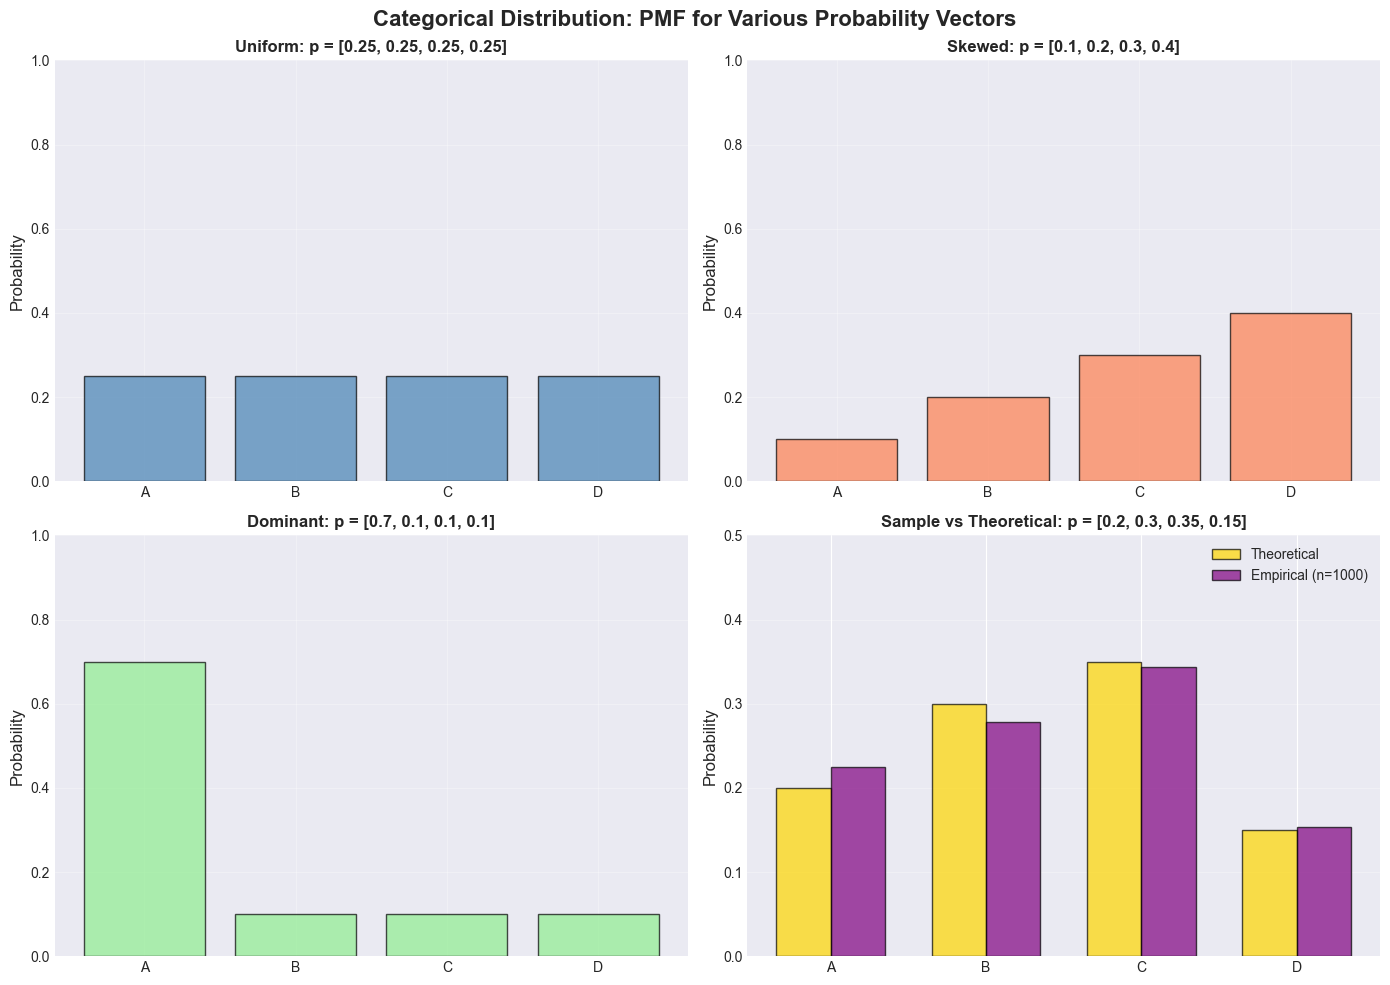

In [34]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle('Categorical Distribution: PMF for Various Probability Vectors', fontsize = 16, fontweight = 'bold')

# Uniform
categories = ['A', 'B', 'C', 'D']
p1 = [0.25, 0.25, 0.25, 0.25]
axes[0, 0].bar(categories, p1, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_ylabel('Probability', fontsize=12)
axes[0, 0].set_title('Uniform: p = [0.25, 0.25, 0.25, 0.25]', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(True, alpha=0.3)

# Skewed
p2 = [0.1, 0.2, 0.3, 0.4]
axes[0, 1].bar(categories, p2, alpha=0.7, color='coral', edgecolor='black')
axes[0, 1].set_ylabel('Probability', fontsize=12)
axes[0, 1].set_title('Skewed: p = [0.1, 0.2, 0.3, 0.4]', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(True, alpha=0.3)

# Dominant category
p3 = [0.7, 0.1, 0.1, 0.1]
axes[1, 0].bar(categories, p3, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_ylabel('Probability', fontsize=12)
axes[1, 0].set_title('Dominant: p = [0.7, 0.1, 0.1, 0.1]', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Sample and compare
np.random.seed(42)
p_sample = [0.2, 0.3, 0.35, 0.15]
sample = np.random.choice(4, size = 1000, p = p_sample)
unique, counts = np.unique(sample, return_counts=True)
empirical = counts / len(sample)

x_pos = np.arange(len(categories))
width = 0.35
axes[1, 1].bar(x_pos - width/2, p_sample, width, alpha=0.7, color='gold', edgecolor='black', label='Theoretical')
axes[1, 1].bar(x_pos + width/2, empirical, width, alpha=0.7, color='purple', edgecolor='black', label='Empirical (n=1000)')
axes[1, 1].set_ylabel('Probability', fontsize=12)
axes[1, 1].set_title('Sample vs Theoretical: p = [0.2, 0.3, 0.35, 0.15]', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_ylim(0, 0.5)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()

For this distribution I am using the `Type of Breast Surgery` variable from the cancer data set.

In [35]:
surgery_data = cancer['Type of Breast Surgery'].dropna()
surgery_counts = surgery_data.value_counts()
surgery_probs = surgery_counts / len(surgery_data)

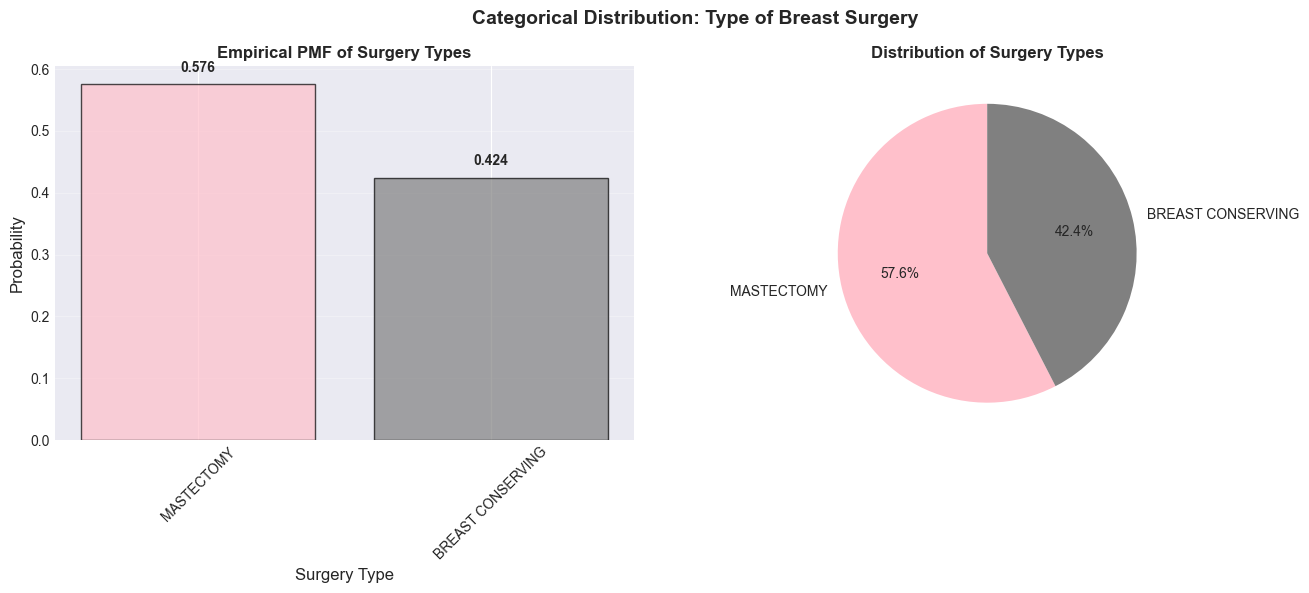

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Categorical Distribution: Type of Breast Surgery', fontsize=14, fontweight='bold')

# Bar plot of probabilities
colors = ['pink', 'gray', 'olive', 'cyan']
axes[0].bar(range(len(surgery_probs)), surgery_probs.values, alpha=0.7, color=colors,
             edgecolor='black', tick_label=surgery_probs.index)
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_xlabel('Surgery Type', fontsize=12)
axes[0].set_title('Empirical PMF of Surgery Types', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

for i, (label, prob) in enumerate(surgery_probs.items()):
    axes[0].text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=10, fontweight='bold')

# Pie chart
axes[1].pie(surgery_probs.values, labels=surgery_probs.index, autopct='%1.1f%%', startangle=90, colors = colors)
axes[1].set_title('Distribution of Surgery Types', fontweight='bold')


plt.tight_layout()

In [37]:
print("Surgery Type Distribution:")
for surgery_type, prob in surgery_probs.items():
    print(f"  {surgery_type}: p={prob:.3f} (n={surgery_counts[surgery_type]})")

Surgery Type Distribution:
  MASTECTOMY: p=0.576 (n=773)
  BREAST CONSERVING: p=0.424 (n=570)
